In [2]:
"""
Created on Mon Oct 11 2025

author: Oscar Rincón-Cardeño
email: os.rinconc@gmail.com
github: https://github.com/orincon

This script analyzes publication data from Scopus related to numerical methods,
machine learning, and wave propagation between 2010 and 2024. It also integrates
Google Trends data to compare the popularity of Python frameworks (TensorFlow,
PyTorch, JAX). The results are visualized in a grid of plots and exported
as PDF and SVG figures.
"""

#%% 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec
 
# Set up paths for utility imports
current_dir = os.getcwd()
utilities_dir = os.path.join(current_dir, '../../utils')

# Change working directory
os.chdir(current_dir)
sys.path.insert(0, utilities_dir)

from plotting import *  # Importar utilidades de trazado personalizadas
 

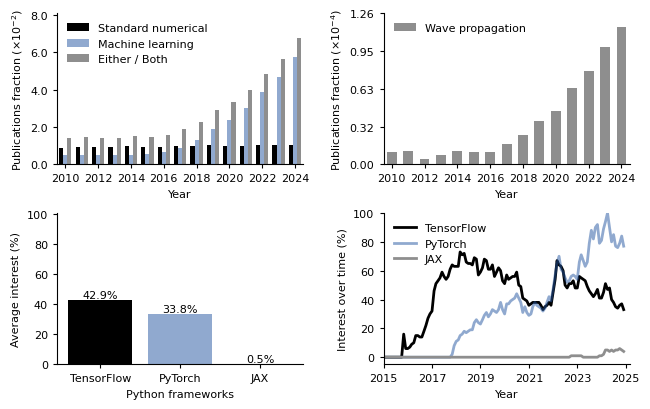

In [ ]:

#%% ========================================================
# === 1. Load data =========================================
# ==========================================================
def read_csv_data(path):
    return pd.read_csv(path, skiprows=6, delimiter=',')

df_ml = read_csv_data('data/ml_scopus_2025_10_11.csv')
df_nm = read_csv_data('data/nm_scopus_2025_10_11.csv')
df_nm_ml = read_csv_data('data/nm_ml_scopus_2025_10_11.csv')
df_waves = read_csv_data('data/wave_scopus_2025_10_11.csv')
df_total = read_csv_data('data/total_scopus_2025_10_11.csv')

#%% ========================================================
# === 2. Extract and filter columns ========================
# ==========================================================
def extract_columns(df):
    return df.iloc[:, 0].to_numpy(), df.iloc[:, 1].to_numpy()

years_ml, works_ml = extract_columns(df_ml)
years_nm, works_nm = extract_columns(df_nm)
years_nm_ml, works_nm_ml = extract_columns(df_nm_ml)
years_waves, works_waves = extract_columns(df_waves)
years_total, works_total = extract_columns(df_total)

# Filter for 2010–2024
def filter_range(years, works, start=2010, end=2024):
    mask = (years >= start) & (years <= end)
    return years[mask], works[mask]

years_total, works_total = filter_range(years_total, works_total)
years_ml, works_ml = filter_range(years_ml, works_ml)
years_nm, works_nm = filter_range(years_nm, works_nm)
years_nm_ml, works_nm_ml = filter_range(years_nm_ml, works_nm_ml)
years_waves, works_waves = filter_range(years_waves, works_waves)

#%% ========================================================
# === 3. Compute relative fractions ========================
# ==========================================================
rel = lambda w: w / works_total

data_relative_ml = {'YEAR': years_ml, 'WORKS': rel(works_ml)}
data_relative_nm = {'YEAR': years_nm, 'WORKS': rel(works_nm)}
data_relative_nm_ml = {'YEAR': years_nm_ml, 'WORKS': rel(works_nm_ml)}
data_relative_waves = {'YEAR': years_waves, 'WORKS': rel(works_waves)}

#%% ========================================================
# === 4. Frameworks dataset ================================
# ==========================================================
df = pd.read_csv("data/google_trends_python_frameworks.csv", skiprows=1)

# Clean data
df.replace("<1", 0.0, inplace=True)
df.columns = [c.strip().replace(': (Worldwide)', '') for c in df.columns]
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
for col in ['TensorFlow', 'PyTorch', 'JAX']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=['Month'], inplace=True)

#%% ========================================================
# === 5. Plot ==============================================
# ==========================================================
color_standard = '#000000'
color_ml = '#2255a080'
color_either = "#8e8e8e"
color_wave = '#8e8e8e'
colors_frameworks = [color_standard, color_ml, color_either]
bar_width = 0.25

fig = plt.figure(figsize=(6.5, 4), constrained_layout=True)
gs = GridSpec(2, 2, figure=fig)
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.05)
  
# === Top-left: Standard / ML / Both ===
ax1 = fig.add_subplot(gs[0, 0])

# x positions are the filtered years for each category
pos_std = years_nm - bar_width
pos_ml = years_ml
pos_either = years_nm_ml + bar_width

ax1.bar(pos_std, data_relative_nm['WORKS']*1e2, width=bar_width,
        color=color_standard, label='Standard numerical')
ax1.bar(pos_ml, data_relative_ml['WORKS']*1e2, width=bar_width,
        color=color_ml, label='Machine learning')
ax1.bar(pos_either, data_relative_nm_ml['WORKS']*1e2, width=bar_width,
        color=color_either, label='Either / Both')

ax1.set_xlabel("Year")
ax1.set_ylabel(r"Publications fraction ($\times 10^{-2}$)")
ax1.set_yticks(np.arange(0, max(data_relative_nm_ml['WORKS']*1e2)*1.2, 2))
ax1.set_yticklabels(np.arange(0, max(data_relative_nm_ml['WORKS']*1e2)*1.2, 2))
ax1.set_xticks(np.arange(2010, 2025, 2))
ax1.set_xticklabels(np.arange(2010, 2025, 2))
ax1.set_xlim(2009.5, 2024.5)
ax1.set_ylim(0, max(data_relative_nm_ml['WORKS']*1e2) * 1.2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax1.legend(frameon=False, loc='upper left', facecolor='white')
ax1.grid(False)

# === Top-right: Wave propagation ===
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(years_waves, data_relative_waves['WORKS']*1e4, width=0.6, color=color_wave,
        linewidth=0.6, label='Wave propagation')
ax2.set_xlabel("Year")
ax2.set_ylabel(r"Publications fraction ($\times 10^{-4}$)")
ticks = np.linspace(0, max(data_relative_waves['WORKS']*1e4)*1.1, 5)
ax2.set_yticks(ticks)
ax2.set_yticklabels([f"{t:.2f}" for t in ticks])
ax2.set_xticks(np.arange(2010, 2025, 2))
ax2.set_xticklabels(np.arange(2010, 2025, 2))
ax2.set_xlim(2009.5, 2024.5)
ax2.set_ylim(0, max(data_relative_waves['WORKS'])*1e4 * 1.1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax2.legend(frameon=False, loc='upper left')
ax2.grid(False)


# === Bottom-left: Average frameworks bar plot ===
ax3 = fig.add_subplot(gs[1, 0])
means = df[['TensorFlow', 'PyTorch', 'JAX']].mean()

# Bar plot (normalized)
bars = ax3.bar(means.index, means.values, color=colors_frameworks)

# Add values on top of bars
for bar, value in zip(bars, means.values):
    height = bar.get_height()
    ax3.text(
        bar.get_x() + bar.get_width() / 2,  # x position: center of the bar
        height + 0.02,                     # y position: a bit above the bar
        f"{value:.1f}%",                    # label text
        ha='center', va='bottom', fontsize=8
    )

# Axis labels and styling
ax3.set_ylabel("Average interest (%)", fontsize=8)
ax3.set_xlabel("Python frameworks", fontsize=8)      
ax3.set_ylim(-0.00, 1.01*100)
ax3.set_yticks(np.arange(0, 1.1*100, 20))
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_color('black')
ax3.spines['left'].set_color('black')
ax3.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax3.grid(False)

# === Bottom-right: Frameworks time series ===
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(df['Month'], df['TensorFlow'], color=colors_frameworks[0], linewidth=2, label="TensorFlow")
ax4.plot(df['Month'], df['PyTorch'], color=colors_frameworks[1], linewidth=2, label="PyTorch")
ax4.plot(df['Month'], df['JAX'], color=colors_frameworks[2], linewidth=2, label="JAX")

years_line = np.arange(df['Month'].dt.year.min(), 2026, 2)
tick_positions = [pd.Timestamp(f"{y}-01-01") for y in years_line]
ax4.set_xticks(tick_positions)
ax4.set_xticklabels(years_line)
ax4.set_yticks(np.arange(0, 1.1*100, 20))
ax4.set_xlim(df['Month'].min(), pd.Timestamp("2025-03-01"))
ax4.set_ylim(-0.05*100, 1*100)
ax4.set_ylabel("Interest over time (%)", fontsize=8)
ax4.set_xlabel("Year", fontsize=8)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_color('black')
ax4.spines['left'].set_color('black')
ax4.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax4.legend(frameon=False, fontsize=8)
ax4.grid(False)

plt.savefig("figs/publication_trends_ml_wave_frameworks_eng.pdf", bbox_inches="tight", dpi=300)
plt.savefig("figs/publication_trends_ml_wave_frameworks_eng.svg", bbox_inches="tight", dpi=300)
plt.show()
 


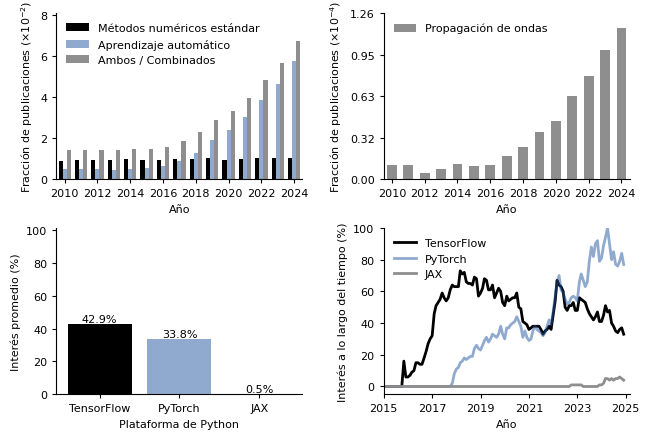

In [11]:
#%% ========================================================
# === 1. Cargar datos ======================================
# ==========================================================
def leer_datos_csv(ruta):
    return pd.read_csv(ruta, skiprows=6, delimiter=',')

df_aa = leer_datos_csv('data/ml_scopus_2025_10_11.csv')
df_mn = leer_datos_csv('data/nm_scopus_2025_10_11.csv')
df_mn_aa = leer_datos_csv('data/nm_ml_scopus_2025_10_11.csv')
df_ondas = leer_datos_csv('data/wave_scopus_2025_10_11.csv')
df_total = leer_datos_csv('data/total_scopus_2025_10_11.csv')

#%% ========================================================
# === 2. Extraer y filtrar columnas ========================
# ==========================================================
def extraer_columnas(df):
    return df.iloc[:, 0].to_numpy(), df.iloc[:, 1].to_numpy()

anios_aa, trabajos_aa = extraer_columnas(df_aa)
anios_mn, trabajos_mn = extraer_columnas(df_mn)
anios_mn_aa, trabajos_mn_aa = extraer_columnas(df_mn_aa)
anios_ondas, trabajos_ondas = extraer_columnas(df_ondas)
anios_total, trabajos_total = extraer_columnas(df_total)

# Filtrar para 2010–2024
def filtrar_rango(anios, trabajos, inicio=2010, fin=2024):
    mascara = (anios >= inicio) & (anios <= fin)
    return anios[mascara], trabajos[mascara]

anios_total, trabajos_total = filtrar_rango(anios_total, trabajos_total)
anios_aa, trabajos_aa = filtrar_rango(anios_aa, trabajos_aa)
anios_mn, trabajos_mn = filtrar_rango(anios_mn, trabajos_mn)
anios_mn_aa, trabajos_mn_aa = filtrar_rango(anios_mn_aa, trabajos_mn_aa)
anios_ondas, trabajos_ondas = filtrar_rango(anios_ondas, trabajos_ondas)

#%% ========================================================
# === 3. Calcular fracciones relativas =====================
# ==========================================================
rel = lambda w: w / trabajos_total

datos_relativos_aa = {'ANIO': anios_aa, 'TRABAJOS': rel(trabajos_aa)}
datos_relativos_mn = {'ANIO': anios_mn, 'TRABAJOS': rel(trabajos_mn)}
datos_relativos_mn_aa = {'ANIO': anios_mn_aa, 'TRABAJOS': rel(trabajos_mn_aa)}
datos_relativos_ondas = {'ANIO': anios_ondas, 'TRABAJOS': rel(trabajos_ondas)}

#%% ========================================================
# === 4. Datos de frameworks ===============================
# ==========================================================
df = pd.read_csv("data/google_trends_python_frameworks.csv", skiprows=1)

# Limpiar datos
df.replace("<1", 0.0, inplace=True)
df.columns = [c.strip().replace(': (Worldwide)', '') for c in df.columns]
df['Mes'] = pd.to_datetime(df['Month'], errors='coerce')
for col in ['TensorFlow', 'PyTorch', 'JAX']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=['Mes'], inplace=True)

#%% ========================================================
# === 5. Gráficas ==========================================
# ==========================================================
color_mn = '#000000'
color_aa = '#2255a080'
color_ambos = "#8e8e8e"
color_ondas = '#8e8e8e'
colores_frameworks = [color_mn, color_aa, color_ambos]
ancho_barra = 0.25

fig = plt.figure(figsize=(6.5, 4.3), constrained_layout=True)
gs = GridSpec(2, 2, figure=fig)
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.05)

# === Superior izquierda: Métodos estándar / AA / Ambos ===
ax1 = fig.add_subplot(gs[0, 0])

pos_mn = anios_mn - ancho_barra
pos_aa = anios_aa
pos_ambos = anios_mn_aa + ancho_barra

ax1.bar(pos_mn, datos_relativos_mn['TRABAJOS']*1e2, width=ancho_barra,
        color=color_mn, label='Métodos numéricos estándar')
ax1.bar(pos_aa, datos_relativos_aa['TRABAJOS']*1e2, width=ancho_barra,
        color=color_aa, label='Aprendizaje automático')
ax1.bar(pos_ambos, datos_relativos_mn_aa['TRABAJOS']*1e2, width=ancho_barra,
        color=color_ambos, label='Ambos / Combinados')

ax1.set_xlabel("Año")
ax1.set_ylabel(r"Fracción de publicaciones ($\times 10^{-2}$)")
ax1.set_yticks(np.arange(0, max(datos_relativos_mn_aa['TRABAJOS']*1e2)*1.2, 2))
ax1.set_xticks(np.arange(2010, 2025, 2))
ax1.set_xlim(2009.5, 2024.5)
ax1.set_ylim(0, max(datos_relativos_mn_aa['TRABAJOS']*1e2) * 1.2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax1.legend(frameon=False, loc='upper left')
ax1.grid(False)

# === Superior derecha: Propagación de ondas ===
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(anios_ondas, datos_relativos_ondas['TRABAJOS']*1e4, width=0.6, color=color_ondas,
        linewidth=0.6, label='Propagación de ondas')
ax2.set_xlabel("Año")
ax2.set_ylabel(r"Fracción de publicaciones ($\times 10^{-4}$)")
ticks = np.linspace(0, max(datos_relativos_ondas['TRABAJOS']*1e4)*1.1, 5)
ax2.set_yticks(ticks)
ax2.set_yticklabels([f"{t:.2f}" for t in ticks])
ax2.set_xticks(np.arange(2010, 2025, 2))
ax2.set_xlim(2009.5, 2024.5)
ax2.set_ylim(0, max(datos_relativos_ondas['TRABAJOS'])*1e4 * 1.1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax2.legend(frameon=False, loc='upper left')
ax2.grid(False)

# === Inferior izquierda: Promedio de interés en frameworks ===
ax3 = fig.add_subplot(gs[1, 0])
promedios = df[['TensorFlow', 'PyTorch', 'JAX']].mean()

barras = ax3.bar(promedios.index, promedios.values, color=colores_frameworks)

for barra, valor in zip(barras, promedios.values):
    altura = barra.get_height()
    ax3.text(
        barra.get_x() + barra.get_width() / 2,
        altura + 0.02,
        f"{valor:.1f}%",
        ha='center', va='bottom', fontsize=8
    )

ax3.set_ylabel("Interés promedio (%)", fontsize=8)
ax3.set_xlabel("Plataforma de Python", fontsize=8)     
ax3.set_ylim(-0.00, 1.01*100)
ax3.set_yticks(np.arange(0, 1.1*100, 20))
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax3.grid(False)

# === Inferior derecha: Series temporales de frameworks ===
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(df['Mes'], df['TensorFlow'], color=colores_frameworks[0], linewidth=2, label="TensorFlow")
ax4.plot(df['Mes'], df['PyTorch'], color=colores_frameworks[1], linewidth=2, label="PyTorch")
ax4.plot(df['Mes'], df['JAX'], color=colores_frameworks[2], linewidth=2, label="JAX")

anios_linea = np.arange(df['Mes'].dt.year.min(), 2026, 2)
posiciones_ticks = [pd.Timestamp(f"{a}-01-01") for a in anios_linea]
ax4.set_xticks(posiciones_ticks)
ax4.set_xticklabels(anios_linea)
ax4.set_yticks(np.arange(0, 1.1*100, 20))
ax4.set_xlim(df['Mes'].min(), pd.Timestamp("2025-03-01"))
ax4.set_ylim(-0.05*100, 1*100)
ax4.set_ylabel("Interés a lo largo del tiempo (%)", fontsize=8)
ax4.set_xlabel("Año")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.tick_params(axis='both', labelsize=8, direction='out', length=3, width=0.8, color='black')
ax4.legend(frameon=False, fontsize=8)
ax4.grid(False)

# Guardar figura
os.makedirs("figs", exist_ok=True)
plt.savefig("figs/publication_trends_ml_wave_frameworks_esp.pdf", bbox_inches="tight", dpi=300)
plt.savefig("figs/publication_trends_ml_wave_frameworks_esp.svg", bbox_inches="tight", dpi=300)
plt.show()
